# Comment Classifier

# # Import the required packages


In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
import string
import re
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\735184\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Import Train Data

In [85]:
datafrm_train=pd.read_csv('train.CSV')

datafrm_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [86]:
datafrm_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


# Import Test Data

In [87]:
datafrm_test=pd.read_csv('test.CSV')

datafrm_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [88]:
datafrm_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


# Checking the Test data 

In [89]:
datafrm_train.tail()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [90]:
datafrm_train.shape

(159571, 8)

In [91]:
datafrm_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [92]:
datafrm_train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [93]:
datafrm_train['Comment_length']  = datafrm_train['comment_text'].str.len()

In [94]:
datafrm_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Comment_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [95]:
datafrm_train['Comment_length'].max()

5000

In [96]:
datafrm_train['Comment_length'].min()

5

# Based on comment Length creating the group to avoid very long comments

In [97]:
lst = []

for i in datafrm_train['Comment_length']:
    if i <= 500:
        lst.append(1)
    elif i >= 501 and i <= 1000:
        lst.append(2)
    elif i >= 1001 and i <= 1500:
        lst.append(3)
    elif i >= 1501 and i <= 2000:
        lst.append(4)
    elif i >= 2001 and i <= 2500:
        lst.append(5)
    elif i >= 2501 and i <= 3000:
        lst.append(6)
    elif i >= 3001 and i <= 3500:
        lst.append(7)
    elif i >= 4001 and i <= 4500:
        lst.append(8)
    elif i >= 4501 and i <= 5000:
        lst.append(9)
    else:
        lst.append(0)
        
datafrm_train['Comment_length_grp'] = lst

# Considering the comments whose length is less than 1001

In [98]:
grp = [1,2]
Main_train = datafrm_train[datafrm_train.Comment_length_grp.isin(grp)]
Main_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Comment_length,Comment_length_grp
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,2
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,1


In [99]:
Main_train.shape

(146209, 10)

In [100]:
Main_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Comment_length,Comment_length_grp
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,2
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,1
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295,1
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99,1
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81,1
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116,1


In [101]:
Main_train.groupby(['Comment_length_grp']).size().reset_index(name='counts')

,Comment_length_grp,counts
0,1,125615
1,2,20594


Text(0, 0.5, 'Count')

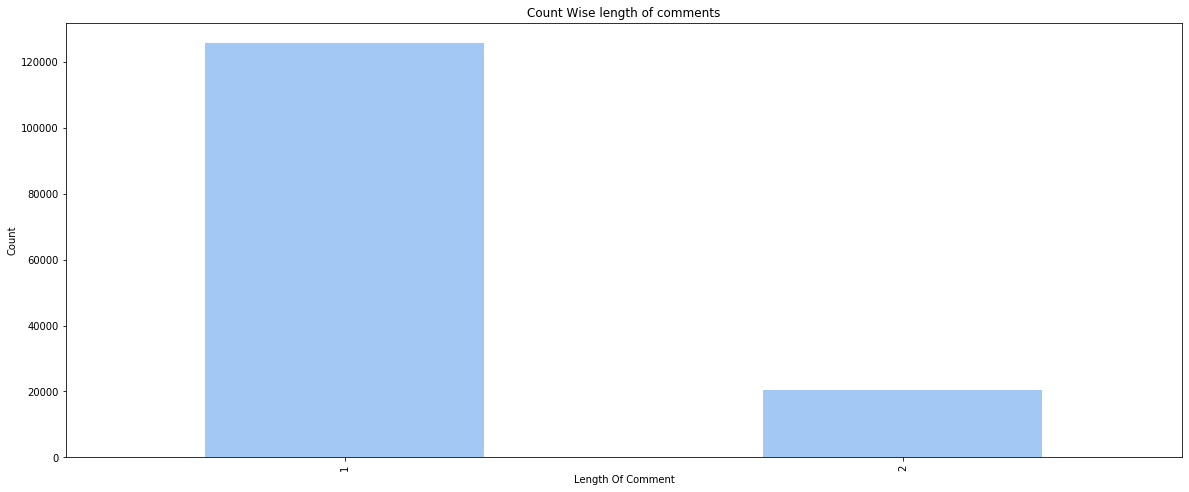

In [102]:
ax =Main_train.groupby(['Comment_length_grp']).size().plot(kind='bar',figsize=(20,8),title="Count Wise length of comments")
ax.set_xlabel("Length Of Comment")
ax.set_ylabel("Count")

# Checking the count of YES and NO for all our output column

In [103]:
for i in Main_train.iloc[:,2:8]:
    print(Main_train.groupby([i]).size().reset_index(name='counts'))

   malignant  counts
0          0  131667
1          1   14542
   highly_malignant  counts
0                 0  144760
1                 1    1449
   rude  counts
0     0  138158
1     1    8051
   threat  counts
0       0  145753
1       1     456
   abuse  counts
0      0  138663
1      1    7546
   loathe  counts
0       0  144879
1       1    1330


# As per our dataset and bove statistics, We can easily understand that malignant comments are very less.

# Checking the value of all the output columns for which the the value is ZERO
    #Total there are 130823 comments for which all the values are ZERO

In [106]:
Main_train[(Main_train['malignant'] == 0) & (Main_train['highly_malignant'] == 0) & (Main_train['rude'] == 0) 
           & (Main_train['threat'] == 0)  & (Main_train['abuse'] == 0) & (Main_train['loathe'] == 0)].count()

id                    130823
comment_text          130823
malignant             130823
highly_malignant      130823
rude                  130823
threat                130823
abuse                 130823
loathe                130823
Comment_length        130823
Comment_length_grp    130823
dtype: int64

In [121]:
Main_train[(Main_train['malignant'] == 1) & (Main_train['highly_malignant'] == 1) & (Main_train['rude'] == 1) 
           & (Main_train['threat'] == 1)  & (Main_train['abuse'] == 1) & (Main_train['loathe'] == 1)].count()

id                    29
comment_text          29
malignant             29
highly_malignant      29
rude                  29
threat                29
abuse                 29
loathe                29
Comment_length        29
Comment_length_grp    29
Clean_cmt             29
dtype: int64

In [122]:
Main_train[(Main_train['malignant'] == 1) & (Main_train['highly_malignant'] == 1) & (Main_train['rude'] == 1) 
           & (Main_train['threat'] == 1)  & (Main_train['abuse'] == 1) & (Main_train['loathe'] == 1)]

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Comment_length,Comment_length_grp,Clean_cmt
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1,150,1,would first time bitch fuck find live sodom wi...
1312,039296aa294ee10b,"SHUT UP, YOU FAT POOP, OR I WILL KICK YOUR ASS!!!",1,1,1,1,1,1,49,1,shut fat poop kick ass
7299,1368c10281978876,"You're a stupid cunt \n\nFuck you dumb arse, y...",1,1,1,1,1,1,278,1,stupid cunt fuck dumb ars mum hairi cunt hope ...
13648,2405c66d017f139e,Bitch \n\nYou are a little bitch. I fuckin spe...,1,1,1,1,1,1,467,1,bitch littl bitch fuckin spend hour big sam ra...
13964,24d2b50726b67167,I am going to murder ZimZalaBim ST47 for being...,1,1,1,1,1,1,68,1,go murder zimzalabim st evil homosexu jew
22158,3a704e2efa9fa300,FUCK YOU!!!!!!!!!!!! YOU FUCKING NIGGER BAG OF...,1,1,1,1,1,1,221,1,fuck fuck nigger bag shit hope die horribl fir...
29968,4f95394c7229f84c,u motherfukkin bitch i want to rape you smelly...,1,1,1,1,1,1,160,1,u motherfukkin bitch want rape smelli whore st...
32098,554a87fb67e51344,Fuck All Asyriac Nation \n\nQamishli belong to...,1,1,1,1,1,1,111,1,fuck asyriac nation qamishli belong arminian f...
33951,5a8eab9cfe601d3a,GO FUCK YOURSELF BITCH. I HATE YOUR SOULD. M...,1,1,1,1,1,1,259,1,go fuck bitch hate sould mother fucker hell th...
38513,66c3bced1735cb90,AM GOING TO RAPE YOU IN THE ASS YOU FAT BITCH ...,1,1,1,1,1,1,817,2,go rape ass fat bitch wheelchairi go rape ass ...


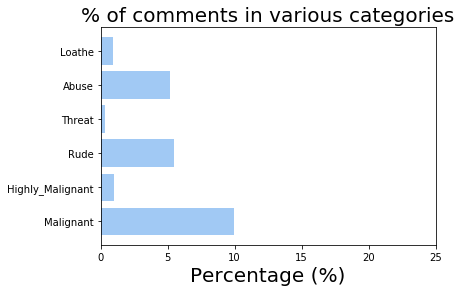

In [107]:
total_row_num=Main_train['id'].count()
sun_malignant = Main_train['malignant'].sum() /total_row_num * 100
sum_highly_malignant = Main_train['highly_malignant'].sum() /total_row_num * 100
sum_rude = Main_train['rude'].sum() /total_row_num * 100
sum_threat= Main_train['threat'].sum() /total_row_num * 100
sum_abuse = Main_train['abuse'].sum() /total_row_num * 100
sum_loathe = Main_train['loathe'].sum() /total_row_num * 100

#Create 6 values that represents above 6 categories as x-axis values [0,1,2,3,4,5]
counter = np.arange(6)

ax=plt.barh(counter,[sun_malignant,sum_highly_malignant,sum_rude,sum_threat,sum_abuse,sum_loathe])
plt.title('% of comments in various categories',size=20)
plt.xlabel('Percentage (%)',size =20)

# Change the ticks 
plt.yticks(counter,('Malignant','Highly_Malignant','Rude','Threat','Abuse','Loathe'))
plt.xticks(np.arange(0,30,5))

plt.show()





# Count of categories 

In [104]:
cmt_count=Main_train.iloc[:,2:8].sum()
cmt_count


malignant           14542
highly_malignant     1449
rude                 8051
threat                456
abuse                7546
loathe               1330
dtype: int64

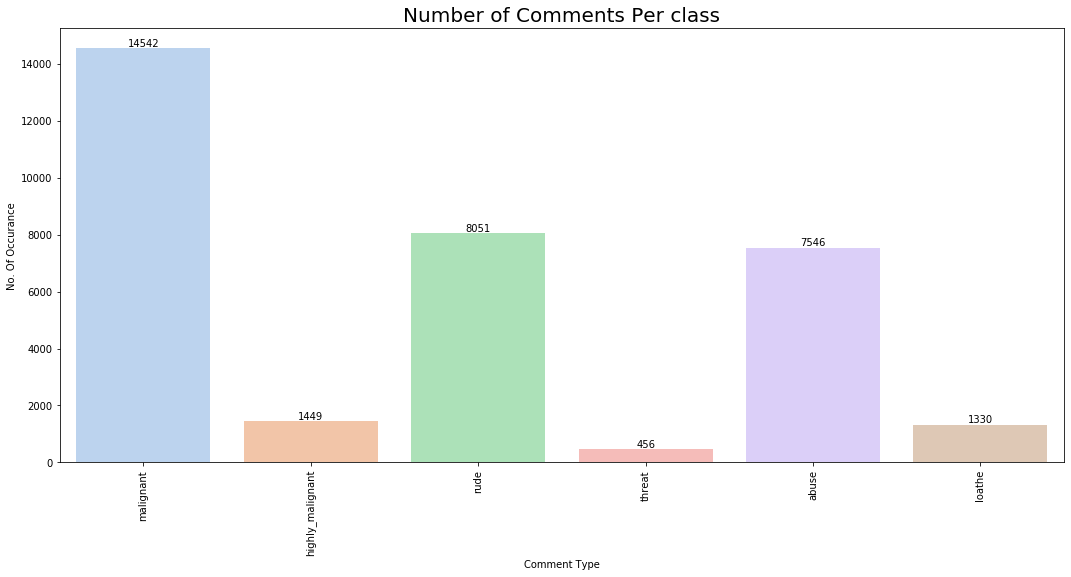

In [105]:
sns.set_palette('pastel')
fig = plt.figure(figsize = (18,8))
ax=sns.barplot(cmt_count.index,cmt_count.values,alpha=0.8)
# title
ax.set_title('Number of Comments Per class', size=20)
plt.xlabel('Comment Type',fontsize = 10)
plt.xticks(rotation=90)
plt.ylabel('No. Of Occurance',fontsize = 10);

rects = ax.patches
labels = cmt_count.values
for rect,label in zip (rects,labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2,height +5 , label, ha='center',va = 'bottom')
#plt.show


# We are removing \n,\t and Links (regex) from text

# Remove Punctuation from trimmed data

# Also remove stop words which do not have any effect on our predections and Convert large number of similar origin words to the same word.

# 
##  STOP WORDS and as below. We are removing these because it will not affect our predections

In [108]:
req_stopwords = stopwords.words('english')
req_stopwords.append("b")
req_stopwords.append("c")
req_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Replace short form into full form

In [109]:
words_dict={"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'v" : "I have",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":"we will",
"didn't": "did not",
"tryin'":"trying"}


# String Cleaning 

In [110]:
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

punctuation_new=string.punctuation.replace('\'','')+'0123456789'
rm_punct = str.maketrans(punctuation_new, ' ' * len(punctuation_new))



comment_main = []
for char in Main_train.comment_text:
    comment_main.append(char)
for i in range(len(comment_main)):
    p=[]
    for word in comment_main[i].split():
        word=word.lower()
        if word in words_dict:
            p.append(words_dict[word].lower())
        else:
            p.append(word)
        comment_main[i]   = ' '.join(p)
for i in range(len(comment_main)):
    comment_main[i] = comment_main[i].replace('\n',' ').replace('\t',' ')
    comment_main[i] = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+~]|[!*\(\),~]|(~?:%[0-9a-f][0-9a-f]))+', '', comment_main[i])
    comment_main[i] = comment_main[i].translate(rm_punct)
    split_words=[]
    for word in comment_main[i].split():
        if word.lower() not in req_stopwords:
            split_words.append(stemmer.stem(lemmatizer.lemmatize(word,pos='v')))
    comment_main[i]   = ' '.join(split_words)

print('Special Char and Digits Removed from comments : ',punctuation_new)    
print('Removed stopwords comments : ',punctuation_new)
    

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\735184\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Special Char and Digits Removed from comments :  !"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789
Removed stopwords comments :  !"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


In [111]:
comment_main

['explan edit make usernam hardcor metallica fan revert vandal closur ga vote new york doll fac pleas remov templat talk page sinc retir',
 "d'aww match background colour seemingli stick thank talk januari utc",
 'hey man realli tri edit war guy constantli remov relev inform talk edit instead talk page seem care format actual info',
 'cannot make real suggest improv wonder section statist later subsect type accid think refer may need tidi exact format ie date format etc later one els first prefer format style refer want pleas let know appear backlog articl review guess may delay review turn list relev form eg wikipedia good articl nomin transport',
 'sir hero chanc rememb page',
 'congratul well use tool well · talk',
 'cocksuck piss around work',
 'vandal matt shirvington articl revert pleas ban',
 "sorri word 'nonsense' offens anyway intend write anyth articl wow would jump vandal mere request encycloped one use school refer select breed page almost stub point 'anim breeding' short m

In [112]:
Main_train['Clean_cmt']=comment_main

# Clean_cmt is the new column which have tha cleaned text only

In [130]:
Main_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Comment_length,Comment_length_grp,Clean_cmt
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,1,explan edit make usernam hardcor metallica fan...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,1,d'aww match background colour seemingli stick ...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,1,hey man realli tri edit war guy constantli rem...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,2,cannot make real suggest improv wonder section...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,1,sir hero chanc rememb page


# Creating subsets of main_text dataframe

In [713]:
Main_train_malignant=Main_train.loc[:,['id','Clean_cmt','malignant']]
Main_train_highly_malignant=Main_train.loc[:,['id','Clean_cmt','highly_malignant']]
Main_train_rude=Main_train.loc[:,['id','Clean_cmt','rude']]
Main_train_threat=Main_train.loc[:,['id','Clean_cmt','threat']]
Main_train_abuse=Main_train.loc[:,['id','Clean_cmt','abuse']]
Main_train_loathe=Main_train.loc[:,['id','Clean_cmt','loathe']]

In [714]:
for i in Main_train.iloc[:,2:8]:
    print(Main_train.groupby([i]).size().reset_index(name='counts'))

   malignant  counts
0          0  131667
1          1   14542
   highly_malignant  counts
0                 0  144760
1                 1    1449
   rude  counts
0     0  138158
1     1    8051
   threat  counts
0       0  145753
1       1     456
   abuse  counts
0      0  138663
1      1    7546
   loathe  counts
0       0  144879
1       1    1330


# Created the dataset which is having all the True and some False data so that our model will not be biased one.

In [715]:
Main_train_malignant = pd.concat((Main_train_malignant[Main_train_malignant['malignant'] ==1].iloc[0:14542,:],
                                 Main_train_malignant[Main_train_malignant['malignant'] ==0].iloc[0:25000,:]),axis=0)

In [716]:
Main_train_highly_malignant = pd.concat((Main_train_highly_malignant[Main_train_highly_malignant['highly_malignant'] ==1].iloc[0:1449,:],
                                 Main_train_highly_malignant[Main_train_highly_malignant['highly_malignant'] ==0].iloc[0:2449,:]),axis=0)

In [717]:
Main_train_rude = pd.concat((Main_train_rude[Main_train_rude['rude'] ==1].iloc[0:8051,:],
                                 Main_train_rude[Main_train_rude['rude'] ==0].iloc[0:15051,:]),axis=0)

In [718]:
Main_train_threat = pd.concat((Main_train_threat[Main_train_threat['threat'] ==1].iloc[0:456,:],
                                 Main_train_threat[Main_train_threat['threat'] ==0].iloc[0:1456,:]),axis=0)

In [719]:
Main_train_abuse = pd.concat((Main_train_abuse[Main_train_abuse['abuse'] ==1].iloc[0:7546,:],
                                 Main_train_abuse[Main_train_abuse['abuse'] ==0].iloc[0:17546,:]),axis=0)

In [720]:
Main_train_loathe = pd.concat((Main_train_loathe[Main_train_loathe['loathe'] ==1].iloc[0:1330,:],
                                 Main_train_loathe[Main_train_loathe['loathe'] ==0].iloc[0:5330,:]),axis=0)

# Word which is used most frequently for each category

In [218]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

def wordcloud(dataframe_name,Column_name):
    subset=dataframe_name[dataframe_name[Column_name]==1]
    text=subset.Clean_cmt.values
    wc = WordCloud(background_color='black',max_words=5000)
    wc.generate(" ".join(text))
    
    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words Frewuently Used in {}".format(Column_name),fontsize=20)
    plt.imshow(wc.recolor(colormap = 'gist_earth',random_state=244),alpha=0.98)
    



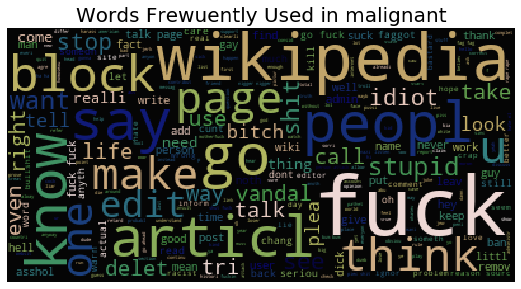

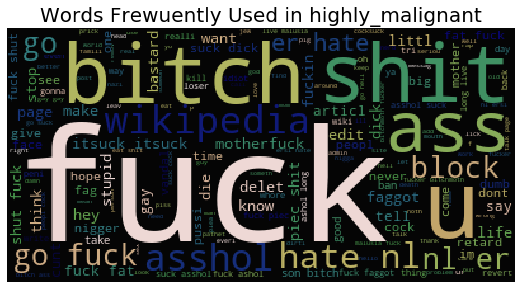

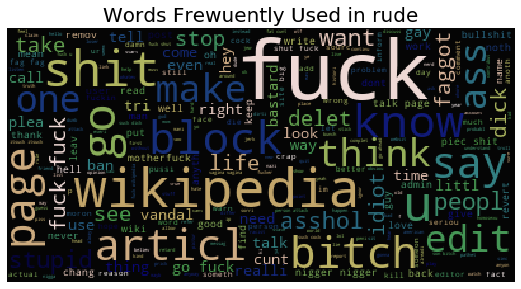

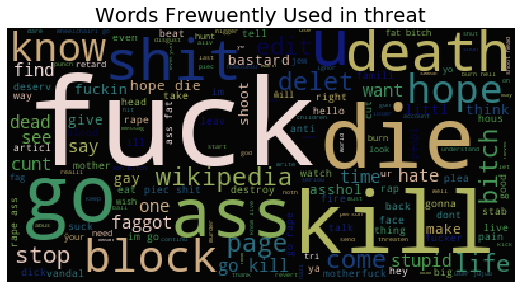

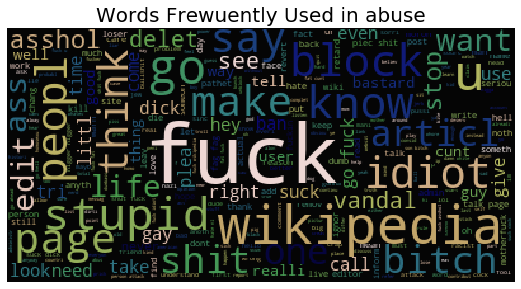

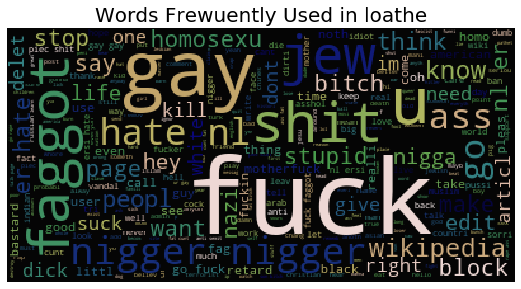

In [220]:
wordcloud(Main_train_malignant,'malignant')
wordcloud(Main_train_highly_malignant,'highly_malignant')
wordcloud(Main_train_rude,'rude')
wordcloud(Main_train_threat,'threat')
wordcloud(Main_train_abuse,'abuse')
wordcloud(Main_train_loathe,'loathe')

In [417]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,r2_score,accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,fbeta_score,precision_recall_curve


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier

In [506]:
dataframes_list=[Main_train_malignant,Main_train_highly_malignant,Main_train_rude,Main_train_threat,Main_train_abuse,Main_train_loathe]
label=['malignant','highly_malignant','rude','threat','abuse','loathe']
model_lst=[LogisticRegression(),LinearSVC(),MultinomialNB(),BernoulliNB(),KNeighborsClassifier(),RandomForestClassifier()]

def vectorize_train_test(model,df,label,vctorz,rs=0):
    x = df.Clean_cmt
    y = df[label]
    vctrz = vctorz(ngram_range=(1, 1))
    X=vctrz.fit_transform(x)
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=rs)
    model_name=model
    model_name.fit(x_train,y_train)
    model_name.score(x_train,y_train)
    pred_val=model_name.predict(x_test)
    return accuracy_score(y_test,pred_val)
#f1_score(y_test,pred_val)
    #return X

best_rndm_state=[]
model_name=[]
accur_score=[]
model_label=[]

for algo in model_lst:
    for indx in range(len(dataframes_list)):
        x = dataframes_list[indx].Clean_cmt
        y = dataframes_list[indx][label[indx]]
        d={}
        a=str(algo)  
        a=a.split('(')[0]
        for i in range(0,4):
            scr = vectorize_train_test(algo,dataframes_list[indx],label[indx],TfidfVectorizer)
            if scr > 0:
                d[i,a]=[scr*100]
        random_st = max(d , key=d.get)
        best_rndm_state.append(random_st[0])
        model_name.append(random_st[1])
        accur_score.append(d[random_st])
        model_label.append(label[indx])




In [507]:
result=pd.DataFrame({'Model': model_name,'Best_Random_State':best_rndm_state,'Accurecy_Score':accur_score,'Label':model_label})
result

,Model,Best_Random_State,Accurecy_Score,Label
0,LogisticRegression,0,[90.52776345195119],malignant
1,LogisticRegression,0,[92.58620689655173],highly_malignant
2,LogisticRegression,0,[92.20738900962434],rude
3,LogisticRegression,0,[92.34972677595628],threat
4,LogisticRegression,0,[90.95727061941041],abuse
5,LogisticRegression,0,[92.10526315789474],loathe
6,LinearSVC,0,[90.97472924187726],malignant
7,LinearSVC,0,[93.62068965517241],highly_malignant
8,LinearSVC,0,[93.54237814343371],rude
9,LinearSVC,0,[90.7103825136612],threat


In [536]:
Accurecy_Max = result.groupby(['Label'])['Accurecy_Score'].transform(max) == result['Accurecy_Score']
result[Accurecy_Max]

,Model,Best_Random_State,Accurecy_Score,Label
3,LogisticRegression,0,[92.34972677595628],threat
6,LinearSVC,0,[90.97472924187726],malignant
7,LinearSVC,0,[93.62068965517241],highly_malignant
8,LinearSVC,0,[93.54237814343371],rude
10,LinearSVC,0,[91.78535939052666],abuse
11,LinearSVC,0,[92.66917293233082],loathe
33,RandomForestClassifier,1,[92.34972677595628],threat


In [565]:
dataframes_list=[Main_train_malignant,Main_train_highly_malignant,Main_train_rude,Main_train_threat,Main_train_abuse,Main_train_loathe]
label=['malignant','highly_malignant','rude','threat','abuse','loathe']
model_lst=[LogisticRegression(),LinearSVC(),MultinomialNB(),BernoulliNB(),KNeighborsClassifier(),RandomForestClassifier()]

def vectorize_train_test(model,df,label,vctorz,rs=0):
    x = df.Clean_cmt
    y = df[label]
    vctrz = vctorz(ngram_range=(1, 1))
    X=vctrz.fit_transform(x)
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=rs)
    model_name=model
    model_name.fit(x_train,y_train)
    model_name.score(x_train,y_train)
    pred_val=model_name.predict(x_test)
    return f1_score(y_test,pred_val)


best_rndm_state=[]
model_name=[]
accur_score=[]
model_label=[]

for algo in model_lst:
    for indx in range(len(dataframes_list)):
        x = dataframes_list[indx].Clean_cmt
        y = dataframes_list[indx][label[indx]]
        d={}
        a=str(algo)  
        a=a.split('(')[0]
        for i in range(0,1):
            scr = vectorize_train_test(algo,dataframes_list[indx],label[indx],TfidfVectorizer)
            if scr > 0:
                d[i,a]=[scr*100]
        random_st = max(d , key=d.get)
        best_rndm_state.append(random_st[0])
        model_name.append(random_st[1])
        accur_score.append(d[random_st])
        model_label.append(label[indx])




In [588]:
result_f1scr=pd.DataFrame({'Model': model_name,'Best_Random_State':best_rndm_state,'Score':accur_score,'Label':model_label})
result_f1scr.loc[:, 'F1_Score'] = result_f1scr.Score.map(lambda x: x[0])
result_f1scr


,Model,Best_Random_State,Score,Label,F1_Score
0,LogisticRegression,0,[90.10238907849829],malignant,90.102389
1,LogisticRegression,0,[92.62435677530019],highly_malignant,92.624357
2,LogisticRegression,0,[91.78396072013093],rude,91.783961
3,LogisticRegression,0,[91.66666666666667],threat,91.666667
4,LogisticRegression,0,[90.4445222261113],abuse,90.444522
5,LogisticRegression,0,[92.01520912547528],loathe,92.015209
6,LinearSVC,0,[90.64671298770712],malignant,90.646713
7,LinearSVC,0,[93.7394247038917],highly_malignant,93.739425
8,LinearSVC,0,[93.27731092436976],rude,93.277311
9,LinearSVC,0,[89.82035928143712],threat,89.820359


In [589]:
F1_Score_Result = result_f1scr.pivot_table(index=['Label'], columns='Model',
                     values='F1_Score', aggfunc='first').reset_index()

F1_Score_Result


Model,Label,BernoulliNB,KNeighborsClassifier,LinearSVC,LogisticRegression,MultinomialNB,RandomForestClassifier
0,abuse,81.548155,24.310041,91.418685,90.444522,88.979315,88.959660
1,highly_malignant,86.416185,89.456869,93.739425,92.624357,93.719807,92.592593
2,loathe,83.252033,81.298300,92.682927,92.015209,92.279412,89.051095
3,malignant,82.369316,34.576271,90.646713,90.102389,89.175978,87.416974
4,rude,81.434130,27.024129,93.277311,91.783961,89.251018,90.915076
5,threat,82.926829,84.946237,89.820359,91.666667,90.810811,92.857143


Text(0.5, 1.0, 'F1-Score of Model')

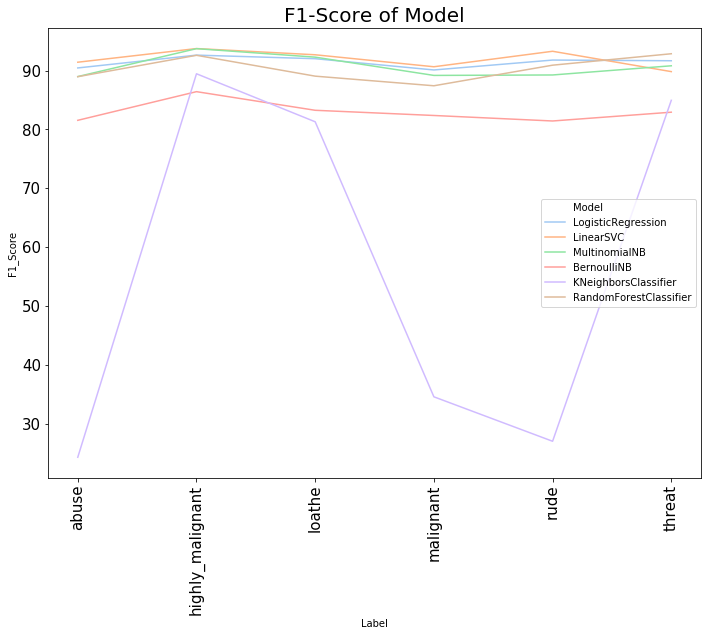

In [611]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.lineplot(x='Label',y='F1_Score',hue='Model',markers=True,data=result_f1scr)
plt.xticks(rotation='90',fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best')
plt.title('F1-Score of Model',fontsize=20)


# High Score For All the Labels

In [612]:
Max_score = result_f1scr.groupby(['Label'])['F1_Score'].transform(max) == result_f1scr['F1_Score']
result_f1scr[Max_score]

,Model,Best_Random_State,Score,Label,F1_Score
6,LinearSVC,0,[90.64671298770712],malignant,90.646713
7,LinearSVC,0,[93.7394247038917],highly_malignant,93.739425
8,LinearSVC,0,[93.27731092436976],rude,93.277311
10,LinearSVC,0,[91.41868512110727],abuse,91.418685
11,LinearSVC,0,[92.6829268292683],loathe,92.682927
33,RandomForestClassifier,0,[92.85714285714286],threat,92.857143


#  For Malignant

In [551]:
dataframes_list=[Main_train_malignant,Main_train_highly_malignant,Main_train_rude,Main_train_threat,Main_train_abuse,Main_train_loathe]
label=['malignant','highly_malignant','rude','threat','abuse','loathe']

from sklearn.metrics import mean_squared_error,mean_absolute_error

x = Main_train_malignant.Clean_cmt
y = Main_train_malignant['malignant']
vctrz = TfidfVectorizer(ngram_range=(1, 1))
X=vctrz.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)
model_name=LinearSVC()
model_name.fit(x_train,y_train)
model_name.score(x_train,y_train)
pred_val=model_name.predict(x_test)
print ('------------LinearSVC-------------')
print ('F1 Score : ',f1_score(y_test,pred_val)*100)
print ('Confusion Matrix :',confusion_matrix(y_test,pred_val))
print ('Classification Report :',classification_report(y_test,pred_val))
print('---------------------------------------------------------')
print('Error :')
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred_val))
print('Mean Squared Error : ',mean_squared_error(y_test,pred_val))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,pred_val)))
print ('---------------')

------------LinearSVC-------------
F1 Score :  90.64671298770712
Confusion Matrix : [[2748  187]
 [ 338 2544]]
Classification Report :               precision    recall  f1-score   support

           0       0.89      0.94      0.91      2935
           1       0.93      0.88      0.91      2882

    accuracy                           0.91      5817
   macro avg       0.91      0.91      0.91      5817
weighted avg       0.91      0.91      0.91      5817

---------------------------------------------------------
Error :
Mean Absolute Error :  0.09025270758122744
Mean Squared Error :  0.09025270758122744
Root Mean Squared Error :  0.30042088406305484
---------------


# For Highly Malignant

In [552]:
dataframes_list=[Main_train_malignant,Main_train_highly_malignant,Main_train_rude,Main_train_threat,Main_train_abuse,Main_train_loathe]
label=['malignant','highly_malignant','rude','threat','abuse','loathe']

from sklearn.metrics import mean_squared_error,mean_absolute_error

x = Main_train_highly_malignant.Clean_cmt
y = Main_train_highly_malignant['highly_malignant']
vctrz = TfidfVectorizer(ngram_range=(1, 1))
X=vctrz.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)
model_name=LinearSVC()
model_name.fit(x_train,y_train)
model_name.score(x_train,y_train)
pred_val=model_name.predict(x_test)
print ('------------LinearSVC-------------')
print ('Accurecy Score : ',accuracy_score(y_test,pred_val)*100)
print ('Confusion Matrix :',confusion_matrix(y_test,pred_val))
print ('Classification Report :',classification_report(y_test,pred_val))
print('---------------------------------------------------------')
print('Error :')
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred_val))
print('Mean Squared Error : ',mean_squared_error(y_test,pred_val))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,pred_val)))
print ('---------------')

------------LinearSVC-------------
Accurecy Score :  93.62068965517241
Confusion Matrix : [[266  10]
 [ 27 277]]
Classification Report :               precision    recall  f1-score   support

           0       0.91      0.96      0.93       276
           1       0.97      0.91      0.94       304

    accuracy                           0.94       580
   macro avg       0.94      0.94      0.94       580
weighted avg       0.94      0.94      0.94       580

---------------------------------------------------------
Error :
Mean Absolute Error :  0.06379310344827586
Mean Squared Error :  0.06379310344827586
Root Mean Squared Error :  0.25257296658248257
---------------


# For Rude

In [553]:
dataframes_list=[Main_train_malignant,Main_train_highly_malignant,Main_train_rude,Main_train_threat,Main_train_abuse,Main_train_loathe]
label=['malignant','highly_malignant','rude','threat','abuse','loathe']

from sklearn.metrics import mean_squared_error,mean_absolute_error

x = Main_train_rude.Clean_cmt
y = Main_train_rude['rude']
vctrz = TfidfVectorizer(ngram_range=(1, 1))
X=vctrz.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)
model_name=LinearSVC()
model_name.fit(x_train,y_train)
model_name.score(x_train,y_train)
pred_val=model_name.predict(x_test)
print ('------------LinearSVC-------------')
print ('Accurecy Score : ',accuracy_score(y_test,pred_val)*100)
print ('Confusion Matrix :',confusion_matrix(y_test,pred_val))
print ('Classification Report :',classification_report(y_test,pred_val))
print('---------------------------------------------------------')
print('Error :')
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred_val))
print('Mean Squared Error : ',mean_squared_error(y_test,pred_val))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,pred_val)))
print ('---------------')

------------LinearSVC-------------
Accurecy Score :  93.54237814343371
Confusion Matrix : [[1570   55]
 [ 153 1443]]
Classification Report :               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1625
           1       0.96      0.90      0.93      1596

    accuracy                           0.94      3221
   macro avg       0.94      0.94      0.94      3221
weighted avg       0.94      0.94      0.94      3221

---------------------------------------------------------
Error :
Mean Absolute Error :  0.06457621856566284
Mean Squared Error :  0.06457621856566284
Root Mean Squared Error :  0.2541185128353754
---------------


# For Threat

In [554]:
dataframes_list=[Main_train_malignant,Main_train_highly_malignant,Main_train_rude,Main_train_threat,Main_train_abuse,Main_train_loathe]
label=['malignant','highly_malignant','rude','threat','abuse','loathe']

from sklearn.metrics import mean_squared_error,mean_absolute_error

x = Main_train_threat.Clean_cmt
y = Main_train_threat['threat']
vctrz = TfidfVectorizer(ngram_range=(1, 1))
X=vctrz.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)
model_name=LogisticRegression()
model_name.fit(x_train,y_train)
model_name.score(x_train,y_train)
pred_val=model_name.predict(x_test)
print ('------------LogisticRegression-------------')
print ('Accurecy Score : ',accuracy_score(y_test,pred_val)*100)
print ('Confusion Matrix :',confusion_matrix(y_test,pred_val))
print ('Classification Report :',classification_report(y_test,pred_val))
print('---------------------------------------------------------')
print('Error :')
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred_val))
print('Mean Squared Error : ',mean_squared_error(y_test,pred_val))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,pred_val)))
print ('---------------')

------------LogisticRegression-------------
Accurecy Score :  92.34972677595628
Confusion Matrix : [[92  6]
 [ 8 77]]
Classification Report :               precision    recall  f1-score   support

           0       0.92      0.94      0.93        98
           1       0.93      0.91      0.92        85

    accuracy                           0.92       183
   macro avg       0.92      0.92      0.92       183
weighted avg       0.92      0.92      0.92       183

---------------------------------------------------------
Error :
Mean Absolute Error :  0.07650273224043716
Mean Squared Error :  0.07650273224043716
Root Mean Squared Error :  0.27659127289275987
---------------


# For Abuse

In [555]:
dataframes_list=[Main_train_malignant,Main_train_highly_malignant,Main_train_rude,Main_train_threat,Main_train_abuse,Main_train_loathe]
label=['malignant','highly_malignant','rude','threat','abuse','loathe']

from sklearn.metrics import mean_squared_error,mean_absolute_error

x = Main_train_abuse.Clean_cmt
y = Main_train_abuse['abuse']
vctrz = TfidfVectorizer(ngram_range=(1, 1))
X=vctrz.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)
model_name=LinearSVC()
model_name.fit(x_train,y_train)
model_name.score(x_train,y_train)
pred_val=model_name.predict(x_test)
print ('------------LinearSVC-------------')
print ('Accurecy Score : ',accuracy_score(y_test,pred_val)*100)
print ('Confusion Matrix :',confusion_matrix(y_test,pred_val))
print ('Classification Report :',classification_report(y_test,pred_val))
print('---------------------------------------------------------')
print('Error :')
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred_val))
print('Mean Squared Error : ',mean_squared_error(y_test,pred_val))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,pred_val)))
print ('---------------')

------------LinearSVC-------------
Accurecy Score :  91.78535939052666
Confusion Matrix : [[1450   93]
 [ 155 1321]]
Classification Report :               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1543
           1       0.93      0.89      0.91      1476

    accuracy                           0.92      3019
   macro avg       0.92      0.92      0.92      3019
weighted avg       0.92      0.92      0.92      3019

---------------------------------------------------------
Error :
Mean Absolute Error :  0.08214640609473335
Mean Squared Error :  0.08214640609473335
Root Mean Squared Error :  0.2866119433916412
---------------


# For loathe

In [556]:
dataframes_list=[Main_train_malignant,Main_train_highly_malignant,Main_train_rude,Main_train_threat,Main_train_abuse,Main_train_loathe]
label=['malignant','highly_malignant','rude','threat','abuse','loathe']

from sklearn.metrics import mean_squared_error,mean_absolute_error

x = Main_train_loathe.Clean_cmt
y = Main_train_loathe['loathe']
vctrz = TfidfVectorizer(ngram_range=(1, 1))
X=vctrz.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)
model_name=LinearSVC()
model_name.fit(x_train,y_train)
model_name.score(x_train,y_train)
pred_val=model_name.predict(x_test)
print ('------------LinearSVC-------------')
print ('Accurecy Score : ',accuracy_score(y_test,pred_val)*100)
print ('Confusion Matrix :',confusion_matrix(y_test,pred_val))
print ('Classification Report :',classification_report(y_test,pred_val))
print('---------------------------------------------------------')
print('Error :')
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred_val))
print('Mean Squared Error : ',mean_squared_error(y_test,pred_val))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,pred_val)))
print ('---------------')

------------LinearSVC-------------
Accurecy Score :  92.66917293233082
Confusion Matrix : [[246  18]
 [ 21 247]]
Classification Report :               precision    recall  f1-score   support

           0       0.92      0.93      0.93       264
           1       0.93      0.92      0.93       268

    accuracy                           0.93       532
   macro avg       0.93      0.93      0.93       532
weighted avg       0.93      0.93      0.93       532

---------------------------------------------------------
Error :
Mean Absolute Error :  0.07330827067669173
Mean Squared Error :  0.07330827067669173
Root Mean Squared Error :  0.2707550012034713
---------------


# Predicting the test data from Training data set For malignant

In [682]:
dataframes_list=[Main_train_malignant,Main_train_highly_malignant,Main_train_rude,Main_train_threat,Main_train_abuse,Main_train_loathe]
label=['malignant','highly_malignant','rude','threat','abuse','loathe']

from sklearn.metrics import mean_squared_error,mean_absolute_error

x = Main_train_malignant.Clean_cmt
y = Main_train_malignant['malignant']
vctrz = TfidfVectorizer(ngram_range=(1, 1))
X=vctrz.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)
#model_name=RandomForestClassifier()
randomfrst=RandomForestClassifier()
randomfrst.fit(x_train,y_train)
randomfrst.predict(X)


array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [690]:
cmt=['Damn shit','I am IronMan..!!']


X_testing=vctrz.transform(cmt)
randomfrst.predict_proba(X_testing)[:,1]



array([0.99      , 0.27876443])

# Applay Above logic on test dataset

In [686]:
datafrm_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [698]:
datafrm_test.shape

(153164, 2)

In [687]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

punctuation_new=string.punctuation.replace('\'','')+'0123456789'
rm_punct = str.maketrans(punctuation_new, ' ' * len(punctuation_new))



comment_test = []
for char in datafrm_test.comment_text:
    comment_test.append(char)
for i in range(len(comment_test)):
    p=[]
    for word in comment_test[i].split():
        word=word.lower()
        if word in words_dict:
            p.append(words_dict[word].lower())
        else:
            p.append(word)
        comment_test[i]   = ' '.join(p)
for i in range(len(comment_test)):
    comment_test[i] = comment_test[i].replace('\n',' ').replace('\t',' ')
    comment_test[i] = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+~]|[!*\(\),~]|(~?:%[0-9a-f][0-9a-f]))+', '', comment_test[i])
    comment_test[i] = comment_test[i].translate(rm_punct)
    split_words_test=[]
    for word in comment_test[i].split():
        if word.lower() not in req_stopwords:
            split_words_test.append(stemmer.stem(lemmatizer.lemmatize(word,pos='v')))
    comment_test[i]   = ' '.join(split_words_test)

print('Special Char and Digits Removed from comments : ',punctuation_new)    
print('Removed stopwords comments : ',punctuation_new)
    

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\735184\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Special Char and Digits Removed from comments :  !"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789
Removed stopwords comments :  !"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


In [688]:
comment_test

['yo bitch ja rule succes ever what hat sad mofucka bitch slap ur pethed white face get kiss ass guy sicken ja rule pride da music man dont diss shit nothin wrong bein like tupac brother fuckin white boy get thing right next time',
 'rfc titl fine imo',
 'sourc zaw ashton lapland —',
 'look back sourc inform updat correct form guess sourc updat shall updat inform thank messag',
 'anonym edit articl',
 'thank understand think highli would revert without discuss',
 'pleas add nonsens wikipedia edit consid vandal quickli undo would like experi pleas use sandbox instead thank',
 'dear god site horribl',
 'fool believ number correct number lie ponder number care error persist long time continu reproduc latest reproduct know encyclopædia britannica almanac wich state magnittud fair enough victim today lot guess peopl come number impress enough know know shameless lucki number throw air gc',
 'doubl redirect fix doubl redirect blank outer one need edit point final target unless think inapprop

# For Malignant Prediciton : On Test data set

In [695]:
dataframes_list=[Main_train_malignant,Main_train_highly_malignant,Main_train_rude,Main_train_threat,Main_train_abuse,Main_train_loathe]
label=['malignant','highly_malignant','rude','threat','abuse','loathe']


x = Main_train_malignant.Clean_cmt
y = Main_train_malignant['malignant']
vctrz = TfidfVectorizer(ngram_range=(1, 1))
X=vctrz.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)
#model_name=RandomForestClassifier()
randomfrst_malignant=RandomForestClassifier()
randomfrst_malignant.fit(x_train,y_train)
randomfrst_malignant.predict(X)


X_testing=vctrz.transform(comment_test)
malignant=randomfrst_malignant.predict_proba(X_testing)[:,1]



In [699]:
print(len(malignant))
malignant

153164


array([0.95      , 0.14251015, 0.12466667, ..., 0.21      , 0.19428571,
       0.7       ])

# For highly_malignant Prediction

In [701]:
dataframes_list=[Main_train_malignant,Main_train_highly_malignant,Main_train_rude,Main_train_threat,Main_train_abuse,Main_train_loathe]
label=['malignant','highly_malignant','rude','threat','abuse','loathe']


x = Main_train_highly_malignant.Clean_cmt
y = Main_train_highly_malignant['highly_malignant']
vctrz = TfidfVectorizer(ngram_range=(1, 1))
X=vctrz.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)
#model_name=RandomForestClassifier()
randomfrst_highly_malignant=RandomForestClassifier()
randomfrst_highly_malignant.fit(x_train,y_train)
randomfrst_highly_malignant.predict(X)


X_testing=vctrz.transform(comment_test)
highly_malignant=randomfrst_highly_malignant.predict_proba(X_testing)[:,1]



In [702]:
print(len(highly_malignant))
highly_malignant

153164


array([0.92, 0.07, 0.08, ..., 0.11, 0.1 , 0.22])

# For Rude Predition

In [708]:
dataframes_list=[Main_train_malignant,Main_train_highly_malignant,Main_train_rude,Main_train_threat,Main_train_abuse,Main_train_loathe]
label=['malignant','highly_malignant','rude','threat','abuse','loathe']


x = Main_train_rude.Clean_cmt
y = Main_train_rude['rude']
vctrz = TfidfVectorizer(ngram_range=(1, 1))
X=vctrz.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)
#model_name=RandomForestClassifier()
randomfrst_rude=RandomForestClassifier()
randomfrst_rude.fit(x_train,y_train)
randomfrst_rude.predict(X)


X_testing=vctrz.transform(comment_test)
rude=randomfrst_rude.predict_proba(X_testing)[:,1]



In [709]:
print(len(rude))
rude

153164


array([0.96      , 0.07612379, 0.09559127, ..., 0.11      , 0.20076923,
       0.68      ])

# For Threat Prediction

In [722]:
dataframes_list=[Main_train_malignant,Main_train_highly_malignant,Main_train_rude,Main_train_threat,Main_train_abuse,Main_train_loathe]
label=['malignant','highly_malignant','rude','threat','abuse','loathe']


x = Main_train_threat.Clean_cmt
y = Main_train_threat['threat']
vctrz = TfidfVectorizer(ngram_range=(1, 1))
X=vctrz.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)
#model_name=RandomForestClassifier()
randomfrst_threat=RandomForestClassifier()
randomfrst_threat.fit(x_train,y_train)
randomfrst_threat.predict(X)


X_testing=vctrz.transform(comment_test)
threat=randomfrst_threat.predict_proba(X_testing)[:,1]



In [723]:
print(len(threat))
threat

153164


array([0.64, 0.11, 0.01, ..., 0.  , 0.08, 0.19])

# For Abuse Prediction

In [729]:
dataframes_list=[Main_train_malignant,Main_train_highly_malignant,Main_train_rude,Main_train_threat,Main_train_abuse,Main_train_loathe]
label=['malignant','highly_malignant','rude','threat','abuse','loathe']


x = Main_train_abuse.Clean_cmt
y = Main_train_abuse['abuse']
vctrz = TfidfVectorizer(ngram_range=(1, 1))
X=vctrz.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)
#model_name=RandomForestClassifier()
randomfrst_abuse=RandomForestClassifier()
randomfrst_abuse.fit(x_train,y_train)
randomfrst_abuse.predict(X)


X_testing=vctrz.transform(comment_test)
abuse=randomfrst_abuse.predict_proba(X_testing)[:,1]



In [730]:
print(len(abuse))
abuse

153164


array([0.85      , 0.02393954, 0.0298317 , ..., 0.03      , 0.06      ,
       0.58      ])

# For Loathe Predicition

In [731]:
dataframes_list=[Main_train_malignant,Main_train_highly_malignant,Main_train_rude,Main_train_threat,Main_train_abuse,Main_train_loathe]
label=['malignant','highly_malignant','rude','threat','abuse','loathe']


x = Main_train_loathe.Clean_cmt
y = Main_train_loathe['loathe']
vctrz = TfidfVectorizer(ngram_range=(1, 1))
X=vctrz.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)
#model_name=RandomForestClassifier()
randomfrst_loathe=RandomForestClassifier()
randomfrst_loathe.fit(x_train,y_train)
randomfrst_loathe.predict(X)


X_testing=vctrz.transform(comment_test)
loathe=randomfrst_loathe.predict_proba(X_testing)[:,1]



In [732]:
print(len(loathe))
loathe

153164


array([0.68      , 0.19006746, 0.03500794, ..., 0.04      , 0.27      ,
       0.17      ])

In [733]:
test_predition=pd.DataFrame({'malignant': malignant,'highly_malignant':highly_malignant,'rude':rude,'threat':threat,'abuse':abuse,'loathe':loathe,'clean_comment':comment_test})
test_predition

,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment
0,0.950000,0.92,0.960000,0.64,0.850000,0.680000,yo bitch ja rule succes ever what hat sad mofu...
1,0.142510,0.07,0.076124,0.11,0.023940,0.190067,rfc titl fine imo
2,0.124667,0.08,0.095591,0.01,0.029832,0.035008,sourc zaw ashton lapland —
3,0.090000,0.10,0.120000,0.17,0.030000,0.010000,look back sourc inform updat correct form gues...
4,0.122105,0.08,0.050000,0.03,0.040000,0.080000,anonym edit articl
...,...,...,...,...,...,...,...
153159,0.680000,0.21,0.633000,0.28,0.390769,0.302667,total agre stuff noth long crap
153160,0.630829,0.32,0.617198,0.61,0.170276,0.099048,throw field home plate get faster throw cut ma...
153161,0.210000,0.11,0.110000,0.00,0.030000,0.040000,okinotorishima categori see chang agre correct...
153162,0.194286,0.10,0.200769,0.08,0.060000,0.270000,one found nation eu germani law return quit si...


In [738]:
DataFrame_Test_Data_Prediction = pd.concat([datafrm_test, test_predition], axis=1)

In [739]:
DataFrame_Test_Data_Prediction

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,0.950000,0.92,0.960000,0.64,0.850000,0.680000,yo bitch ja rule succes ever what hat sad mofu...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0.142510,0.07,0.076124,0.11,0.023940,0.190067,rfc titl fine imo
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0.124667,0.08,0.095591,0.01,0.029832,0.035008,sourc zaw ashton lapland —
3,00017563c3f7919a,":If you have a look back at the source, the in...",0.090000,0.10,0.120000,0.17,0.030000,0.010000,look back sourc inform updat correct form gues...
4,00017695ad8997eb,I don't anonymously edit articles at all.,0.122105,0.08,0.050000,0.03,0.040000,0.080000,anonym edit articl
...,...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",0.680000,0.21,0.633000,0.28,0.390769,0.302667,total agre stuff noth long crap
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,0.630829,0.32,0.617198,0.61,0.170276,0.099048,throw field home plate get faster throw cut ma...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",0.210000,0.11,0.110000,0.00,0.030000,0.040000,okinotorishima categori see chang agre correct...
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",0.194286,0.10,0.200769,0.08,0.060000,0.270000,one found nation eu germani law return quit si...


In [751]:
DataFrame_Test_Data_Prediction.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,0.950000,0.92,0.960000,0.64,0.850000,0.680000,yo bitch ja rule succes ever what hat sad mofu...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0.142510,0.07,0.076124,0.11,0.023940,0.190067,rfc titl fine imo
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0.124667,0.08,0.095591,0.01,0.029832,0.035008,sourc zaw ashton lapland —
3,00017563c3f7919a,":If you have a look back at the source, the in...",0.090000,0.10,0.120000,0.17,0.030000,0.010000,look back sourc inform updat correct form gues...
4,00017695ad8997eb,I don't anonymously edit articles at all.,0.122105,0.08,0.050000,0.03,0.040000,0.080000,anonym edit articl
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0.150000,0.07,0.100000,0.08,0.060000,0.000000,thank understand think highli would revert wit...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...,0.040000,0.03,0.090000,0.04,0.010000,0.000000,pleas add nonsens wikipedia edit consid vandal...
7,000247e83dcc1211,:Dear god this site is horrible.,0.634563,0.12,0.338705,0.10,0.345656,0.376179,dear god site horribl
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ...",0.350000,0.09,0.260000,0.03,0.240000,0.000000,fool believ number correct number lie ponder n...
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...,0.070000,0.06,0.080000,0.00,0.030000,0.040000,doubl redirect fix doubl redirect blank outer ...


In [745]:
cmt_tst=[]

for i in DataFrame_Test_Data_Prediction['comment_text']:
    cmt_tst.append(i)


In [750]:
cmt_tst[-1]

'" \n :::Stop already. Your bullshit is not welcome here. I\'m no fool, and if you think that kind of explination is enough, well pity you.    "'

In [753]:
cmt_tst[:1]

["Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"]